# Lecture 3.3: Logistic Regression

Part of the codes and demonstrations by courtesy of [Sunil Kumar Dash](https://www.analyticsvidhya.com/blog/2022/02/implementing-logistic-regression-from-scratch-using-python/).

##  1. Mathematical Formulation

In the last lecture, we introduced the logistic regression, which tries to use $\textbf{x}$ to predict the binary label $y \in \{-1, +1\}$. The optimization problem is:
$$(\mathbf{w}^\star,b^\star) = \mathop{\mathrm{argmin}}_{\mathbf{w},b} \frac{1}{C} \mathbf{w}^T\mathbf{w} + \sum_{i=1}^M \log (1+\exp(-y^{(i)} (\mathbf{w}^T \textbf{x}^{(i)}+b)))$$

with the logistic loss function: 
$$L(z^{(i)}) = \log (1+\exp(-z^{(i)})),$$
where $z^{(i)}=y^{(i)}(\mathbf{w}^T \textbf{x}^{(i)} + b)$.

While $L(z^{(i)})$ is of mathematical interest for loss comparison, it is not often used in practice. Instead, the cross-entropy loss
$$\ell_\mathrm{CE} = \sum_{i=1}^M -y^{(i)}\log\hat{y}^{(i)} - (1-y^{(i)})\log(1-\hat{y}^{(i)})$$

is often used, due to the convinence it brings to calculate both $\nabla \ell_\mathrm{CE}$ and $\nabla^2 \ell_\mathrm{CE}$, which are often needed for convergence analysis. Here $\hat{y}^{(i)}$ is the predicted value of $y$. Below we will give a simple derivation and implementation. For a more detailed mathematical treatment, please refer to Section 3.2 of the lecture note.


### 1.1 New (but Equivalent) Setting

Firstly, we call our 2 classes the positive class $y^{(i)}=1$ and the negative class $y^{(i)} = 0$, i.e., $y^{(i)}\in \{0, 1\}$ (remember we define the labels as $y^{(i)}=\pm1$ in lecture).

Recall the prediction after the sigmoid activation function $\sigma$:

$$ \hat{y} =\sigma(\mathbf{w}^T \textbf{x} + b) = \sigma(z). $$

Here, we "abuse" the mathematical notation $z$ to indicate $\mathbf{w}^T \textbf{x} + b$ not $y(\mathbf{w}^T \textbf{x} + b)$ as done in previous lectures. The sigmoid function $\sigma$, sometimes called a squashing function or a *logistic* function - thus the name logistic regression - maps a real-valued input to the range 0 to 1. Indeed, the logistic function $\sigma(z)$ is a good choice since it has the form of a probability, i.e. $\sigma(-z)=1-\sigma(z)$ and $\sigma(z)\in (0,1)$ as $z\rightarrow \pm \infty$. If we pick the labels $y\in\{0,1\}$, we may assign  

\begin{equation}
\begin{aligned}
p(y=1|z) & =\sigma(z)=\frac{1}{1+e^{-z}}\\
p(y=0|z) & =1-\sigma(z)=\frac{1}{1+e^{z}}\\
\end{aligned}
\end{equation}

which can be written more compactly as $p(y|\mathbf{x})  =\sigma(f(\mathbf{x}))^y(1-\sigma(f(\mathbf{x})))^{1-y}$ (equivalent to $p(y|\textbf{x})= \sigma(yf(\textbf{x}))$ under $y=\pm1$). 


### 1.2 Cross-Entropy Loss

Since now we're thinking about output probabilities,
one natural objective is that we should choose the weights (or parameters $\textbf{w}, b$ )
that give the actual labels in the training data highest probability. So here we give a maximum likelihood estimation. For $M$ samples $\{\textbf{x}^{(i)},y^{(i)}\}$ we want to maximize

$$\max_{\textbf{w},b} p\big( y^{(1)},\dots,y^{(M)} \big|\,\textbf{x}^{(1)},\dots,\textbf{x}^{(M)} \big)$$

Because each example is independent of the others, and each label depends only on the features of the corresponding examples, we can rewirte the above as

$$\max_{\textbf{w},b} \prod_{i=1}^{M} p(y^{(i)}| \textbf{x}^{(i)})=\max_{\textbf{w},b} p\big(y^{(1)}|\textbf{x}^{(1)}\big) p\big(y^{(2)}|\textbf{x}^{(2)}\big)\cdots p\big(y^{(M)}|\textbf{x}^{(M)}\big)$$

This function is a product over the examples, but in general, it's a lot easier to work with a loss function that breaks down as a sum over the training examples. So we use log function:

$$\max_{\textbf{w},b} \log\big(\prod_{i=1}^M p(y^{(i)}|\textbf{x}^{(i)})\big)= \sum_{i=1}^M\log\big(p(y^{(i)}|\textbf{x}^{(i)})\big)=\log\big(p(y^{(1)}|\textbf{x}^{(1)})\big)+\cdots+\log\big(p(y^{(M)}|\textbf{x}^{(M)})\big)$$

Because we typically express our objective as a *loss* we can just flip the sign, giving us the *negative log probability:*

$$  \min_{\textbf{w},b} \Big(- \sum_{i=1}^M\log\big(p(y^{(i)}|\textbf{x}^{(i)})\big)\Big)$$

Recall that we can write $p(y^{(i)}|z^{(i)})$ compactly as

$$p(y^{(i)}|z^{(i)}) =\sigma(z^{(i)})^{y^{(i)}}(1-\sigma(z^{(i)}))^{1-y^{(i)}},$$

where $\hat{y}^{(i)} = \sigma(z^{(i)}) = \sigma(\textbf{w}^T \textbf{x}^{(i)} + b)$ . Let us work through this expression. We have

\begin{equation}
\begin{aligned}
\log\big(p(y|z)\big)&=
\log\big(\sigma(z)^{y}(1-\sigma(z))^{1-y}\big)\\
&=y\log\sigma(z) + (1-y)\log(1-\sigma(z))\\
&=y\log\hat{y} + (1-y)\log(1-\hat{y})
\end{aligned}
\end{equation}

Therefore we take the negative of this expression and minimize the objective function 

$$\ell_\mathrm{CE} = \sum_{i=1}^M -y^{(i)}\log\hat{y}^{(i)} - (1-y^{(i)})\log(1-\hat{y}^{(i)})$$

We find that the loss function is depend on two terms:

* $y^{(i)}\log \hat{y}^{(i)}$
* $(1-y^{(i)})\log (1-\hat{y}^{(i)})$

But recall that we are intepreting $\hat{y}^{(i)}=\sigma(z^{(i)})$ as a probability that $\textbf{x}^{(i)}$ has a given label, namely $p(y^{(i)}=1|z^{(i)})=\sigma(z^{(i)})$ and $p(y^{(i)}=0|z^{(i)})=1-\sigma(z^{(i)})$. Because $y^{(i)}$ only takes values $0$ or $1$, for an given data point, one of these terms disappears. 

When $y^{(i)}$ is $1$, this loss says that we should maximize $\log \hat{y}^{(i)}$, giving higher probability to the *correct* answer. 
When $y^{(i)}$ is $0$, this loss function takes value $\log (1-\hat{y}^{(i)})$. That says that we should maximize the value $1-\hat{y}$ which we already know is the probability assigned to $\textbf{x}^{(i)}$ belonging to the negative class.


Note that this loss function is commonly called **binary cross entropy**. It is a special case of [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy), which can apply to the multi-class ($>2$) setting. 

*If instead we use the labels $y^{(i)}=\pm1$ like in the last lecture, the loss function has to be modified to $\log(1+e^{-z})$. This is why there exists two versions of logistic regression. See the lecture note for more information.*


# 2. Implementation

Below we will build a logistic regression model from scratch and compare it to the scikit-learn's implementation (`LogisticRegression()`). It will be helpful if you have a prior understanding of matrix algebra and Numpy. Here, we will only deal with Numpy arrays. 

**Initialization and Dataset.** We will first import the necessary libraries and datasets. We will use sklearn's `make_classification` dataset. We choose only four features and build a binary-classification problem.

In [12]:
import numpy as np
from numpy import log, dot, exp, shape
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

np.random.seed(1)

X,y = make_classification(n_features = 4, n_classes=2)
X_tr, X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

It is a good practice to standardize data before feeding it to the algorithm. This is often necessary when attributes are from different scales. Mathematically it is given as $\textbf{x} \leftarrow \frac{\textbf{x}-\pmb{\mu}}{\pmb{\gamma}}$, where $\pmb{\mu}$ is the mean and $\pmb{\gamma}$ is standard deviation.

In [13]:
def standardize(X):
    for i in range(shape(X)[1]):
        X[:,i] = (X[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
standardize(X_tr)
standardize(X_te)

**Loss Function.** Below is the python implementation of the binary cross entropy loss $\ell_\mathrm{CE}$. We ignore the bias term $b$ because it can be integrated into $\textbf{w}$.

In [15]:
def cost(params):
    z = dot(X,params)
    cost0 = y.T.dot(log(self.sigmoid(z)))
    cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
    cost = -((cost1 + cost0))/len(y)
    return cost

**Gradient Descent.** In practice, gradient descent is one of the easiest method to understand and implement. In this work, we use gradient descent to solve the above cross entropy loss. Gradient descent is an optimization algorithm that is responsible for the learning of best-fitting parameters. The gradients are the vector of the 1st order derivative of the loss function. These are the direction of the steepest ascent or maximum of a function. For gradient descent, we move in the opposite direction of the gradients. We will be updating the weights in every iteration until the convergence. 
The gradient of $\textbf{w}, b$ are:
$$ \frac{\partial \ell_\mathrm{CE}}{\partial \textbf{w}} = \sum_{i=1}^M (\hat{y}^{(i)} - y^{(i)})\cdot \textbf{x}^{(i)}, \\
\frac{\partial \ell_\mathrm{CE}}{\partial b} = \sum_{i=1}^M (\hat{y}^{(i)} - y^{(i)}) $$

Here in our implementation of gradient descent, we ignore the bias term $b$ because it can be integrated into $\textbf{w}$.

In [4]:
def fit(self,X,y,alpha=0.001,iter=100):
    params,X = self.initialize(X)  # intergrate b into w
    cost_list = np.zeros(iter,)
    for i in range(iter):
        params = params - alpha * dot(X.T, self.sigmoid(dot(X,params)) - np.reshape(y,(len(y),1)))
        cost_list[i] = cost(params)
    self.params = params
    return cost_list

**Prediction.** We trained the model on a training dataset, and we will use the learned parameters to predict the unseen data.

In [5]:
def predict(self,X):
    z = dot(self.initialize(X)[1],self.weights)
    lis = []
    for i in self.sigmoid(z):
        if i>0.5:
            lis.append(1)
        else:
            lis.append(0)
    return lis

**Error Analysis and Evaluation.**
Now that we are done with the prediction, then we will measure how good our model predicts for unseen data. Firstly, we look at the different types of errors that the classifier makes:
- _True Positive (TP)_: classifier correctly said positive
- _True Negative (TN)_: classifier correctly said negtive
- _False Positive (FP)_: classifier said positive, but actually negtive
- _False Negative (FN)_: classifier said negtive, but actually positive

This is summarized in the following table:

<table>
<tr><th colspan=2 rowspan=2><th colspan=2 style="text-align: center">Actual</th></tr>
<tr>  <th>Positive</th><th>Negtive</th></tr>
<tr><th rowspan=2>Prediction</th><th>Positive</th><td>True Positive (TP)</td><td>False Positive (FP)</td></tr>
<tr>  <th>Negtive</th><td>False Negative (FN)</td><td>True Negative (TN)</td></tr>
</table>

Then, we introduce four indices to describe our performance: the accuracy, precision, recall, and F1-score. An intuitive understanding of these indices is listed here:
- _Accuracy (Accuracy)_: It tells us how often that our machine learning model correctly predict an outcome out of all the test samples. 
- _Precision (Precision)_: It measures the proportion of positively predicted labels that are actually correct. 
- _Recall (Recall)_: It measures the model’s ability to correctly predict the positives out of actual positives.
- _F1 Score (F1)_:  It gives equal weight to both the Precision and Recall for measuring the performance, making it an alternative to Accuracy metric (it doesn’t require us to know the total number of samples).

Mathematically, 4 metrics can be calculated by:

$$ \mathrm{Accuracy} = \frac{TP + TN}{TP + FN + TN + FP}, \\ \mathrm{Precision} = \frac{TP}{FP + TP}, \\
\mathrm{Recall} = \frac{TP}{FN + TP}, \\ F1 = \frac{2 \cdot \mathrm{Precision} \cdot \mathrm{Recall}}{\mathrm{Precision} + \mathrm{Recall}}.$$

In this lecture, we give the code to calculate the 4 indices. 

In [6]:
def Evaluate(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1_score = 2 * precision * recall / (precision + recall)
    acc = (tp+tn)/(tp+tn+fp+fn)
    return precision, recall, acc, f1_score

**Put All Together.** Now that we are done with every part, we will put everything together in a single class.

In [7]:
import matplotlib.pyplot as plt

class LogidticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    def fit(self, X, y, alpha=0.001, iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis


And then we train and test the model. For simplicity, here we only show the *Accuracy*, and other 3 indices are omitted.

In [8]:
import time

standardize(X_tr)
standardize(X_te)

start = time.time()
obj1 = LogidticRegression()
cost_list = obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
end = time.time()
y_train = obj1.predict(X_tr)
#Let's see the f1-score for training and testing data
_, _, acc_tr, _ = Evaluate(y_tr,y_train)
_, _, acc_te, _ = Evaluate(y_te,y_pred)
print('Training ACC:  ' + str(acc_tr))
print('Testing ACC:  ' + str(acc_te))
print("Need time =", str(end-start))


Training ACC:  0.9777777777777777
Testing ACC:  0.9
Need time = 0.013265609741210938


Now let’s see if our loss function is descending or not:

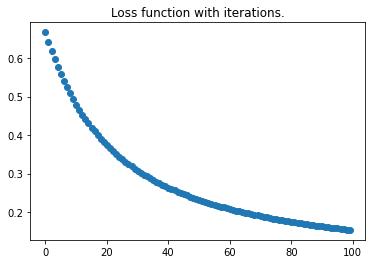

In [9]:
plt.scatter(range(0,100), cost_list[0:100])
plt.title("Loss function with iterations.")
plt.show()

In the above plot, we can see that the cost function decreases with every iteration and almost gets flattened as we move towards 100. You can fiddle around with hyper-parameters and see the behaviour of cost function.

Now, let’s see how our logistic regression fares in comparison to sklearn’s logistic regression.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
start = time.time()
model = LogisticRegression().fit(X_tr,y_tr)
y_pred = model.predict(X_te)
end = time.time()
_, _, sk_acc, _ = Evaluate(y_te, y_pred)
print('Testing ACC:  ' + str(sk_acc))
print("Need time =", str(end-start))

Testing ACC:  0.9
Need time = 0.0033266544342041016


At the end, we achieve the same accuracy to scikit-learn's implementation, but they are faster than ours.

## 3. Conclusion

We have successfully implemented a gradient descent algorithm for the logistic regression problem and compared with the sklearn version. We achieve the same accuracy to scikit-learn's implementations, but they are faster than ours.